<a href="https://colab.research.google.com/github/emmaSDNZ/DL_-Deep-Dream/blob/main/Deep_Dream.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Importando Paquetes
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [23]:
#Modelo preentreando
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, None, None, 32)       864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, None, None, 32)       96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, None, None, 32)       0         ['batch_normalizati

In [24]:
#Seleccion de capas
names =["mixed3", "mixed5"]
layers = [base_model.get_layer(name).output for name in names]

In [25]:
#Modelo Extraccion de Caracteristicas
deepdream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

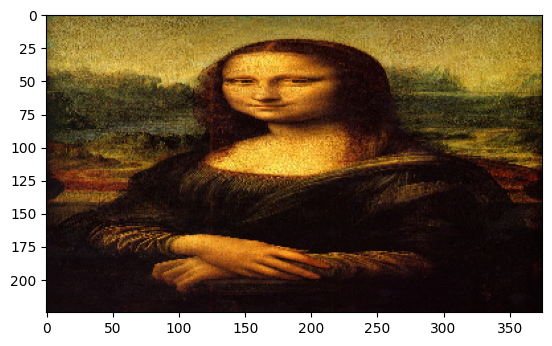

In [26]:
#PreProcesamiento de Imagen
Sample_Image = tf.keras.preprocessing.image.load_img(r'/content/arte-cuadro-da-leonardo-wallpaper-preview.jpg', target_size = (225, 375))
np.shape(Sample_Image)

plt.imshow(Sample_Image)
plt.show()

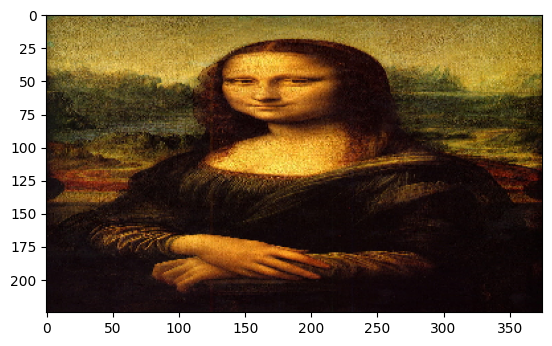

In [27]:
#Normalizacion
Sample_Image = np.array(Sample_Image) / 255.0
Sample_Image.shape
plt.imshow(Sample_Image)

In [28]:
#Autocodificador
Sample_Image.max()
Sample_Image.min()

0.0

In [29]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
Sample_Image.shape

(225, 375, 3)

In [30]:
#Aplicamos la Variable
Sample_Image = tf.Variable(tf.keras.applications.inception_v3.preprocess_input(Sample_Image))

Sample_Image = tf.expand_dims(Sample_Image, axis = 0)
np.shape(Sample_Image)

TensorShape([1, 225, 375, 3])

In [31]:
#Activamos Modelos
activations = deepdream_model(Sample_Image)

In [32]:
activations

[<tf.Tensor: shape=(1, 12, 21, 768), dtype=float32, numpy=
 array([[[[0.        , 0.6006424 , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.70386356, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.1183489 , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.14779186, 0.11369556, ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
        

In [33]:
#CALCULO FUNCION DE PERDIDA

def calc_loss(image, model):
  img_batch = tf.expand_dims(image, axis=0) # Convertir a formato de lotes / batch
  layer_activations = model(img_batch) # Corriendo el Modelo
  print('VALORES DE ACTIVACION (LAYER OUTPUT) =\n', layer_activations)

  losses = [] # accumulator to hold all the losses
  for act in layer_activations:
    loss = tf.math.reduce_mean(act) # calculate mean of each activation
    losses.append(loss)

  print('PERDIDAS (DE MULTIPLES CAPAS DE ACTIVACION) = ', losses)
  print('FORMA DE PERDIDA (DE MULTIPLES CAPAS DE ACTIVACION) = ', tf.shape(losses))
  print('SUMA DE TODAS LAS PERDIDAS (DE TODAS LAS CAPAS SELECCIONADAS)= ', tf.reduce_sum(losses))

  return  tf.reduce_sum(losses) # Calculo de suma



In [34]:
#Probando Modelo
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/arte-cuadro-da-leonardo-wallpaper-preview.jpg', target_size = (225, 375))
Sample_Image = np.array(Sample_Image)/255.0
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
Sample_Image = tf.Variable(tf.keras.applications.inception_v3.preprocess_input(Sample_Image))

loss = calc_loss(Sample_Image, deepdream_model)


loss


VALORES DE ACTIVACION (LAYER OUTPUT) =
 [<tf.Tensor: shape=(1, 12, 21, 768), dtype=float32, numpy=
array([[[[0.        , 0.6006424 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.70386356, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.1183489 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.14779186, 0.11369556, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
   

<tf.Tensor: shape=(), dtype=float32, numpy=0.4358839>

In [35]:
loss = calc_loss(Sample_Image, deepdream_model)


loss


VALORES DE ACTIVACION (LAYER OUTPUT) =
 [<tf.Tensor: shape=(1, 12, 21, 768), dtype=float32, numpy=
array([[[[0.        , 0.6006424 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.70386356, 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.1183489 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.14779186, 0.11369556, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
   

<tf.Tensor: shape=(), dtype=float32, numpy=0.4358839>

VALORES DE ACTIVACION (LAYER OUTPUT) =
 [<tf.Tensor 'model_1/mixed3/concat:0' shape=(1, 20, 13, 768) dtype=float32>, <tf.Tensor 'model_1/mixed5/concat:0' shape=(1, 20, 13, 768) dtype=float32>]
PERDIDAS (DE MULTIPLES CAPAS DE ACTIVACION) =  [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>]
FORMA DE PERDIDA (DE MULTIPLES CAPAS DE ACTIVACION) =  Tensor("Shape:0", shape=(1,), dtype=int32)
SUMA DE TODAS LAS PERDIDAS (DE TODAS LAS CAPAS SELECCIONADAS)=  Tensor("Sum:0", shape=(), dtype=float32)
GRADIENTES =
 Tensor("gradient_tape/Reshape_3:0", shape=(350, 250, 3), dtype=float32)
FORMA DE GRADIENTES =
 (350, 250, 3)


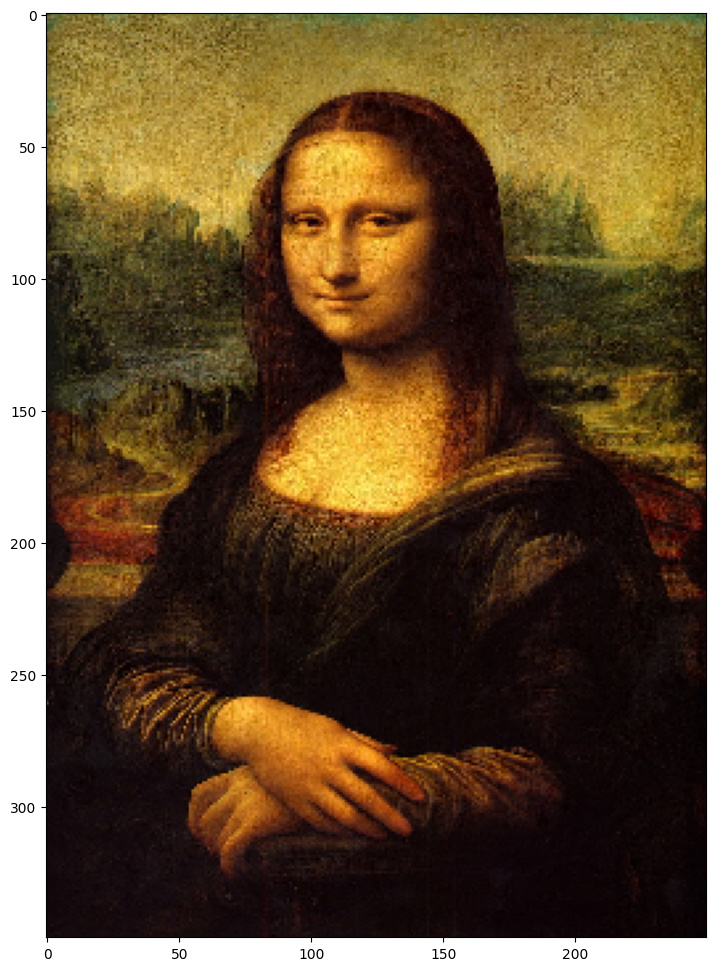

Step 0, loss 0.6353409290313721


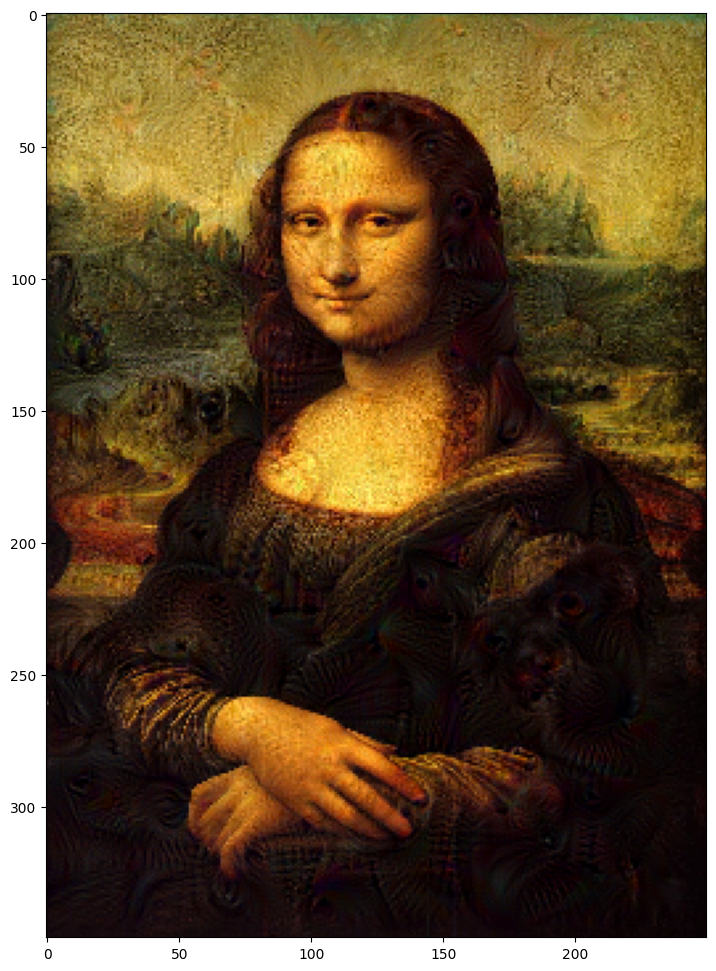

Step 100, loss 1.4576098918914795


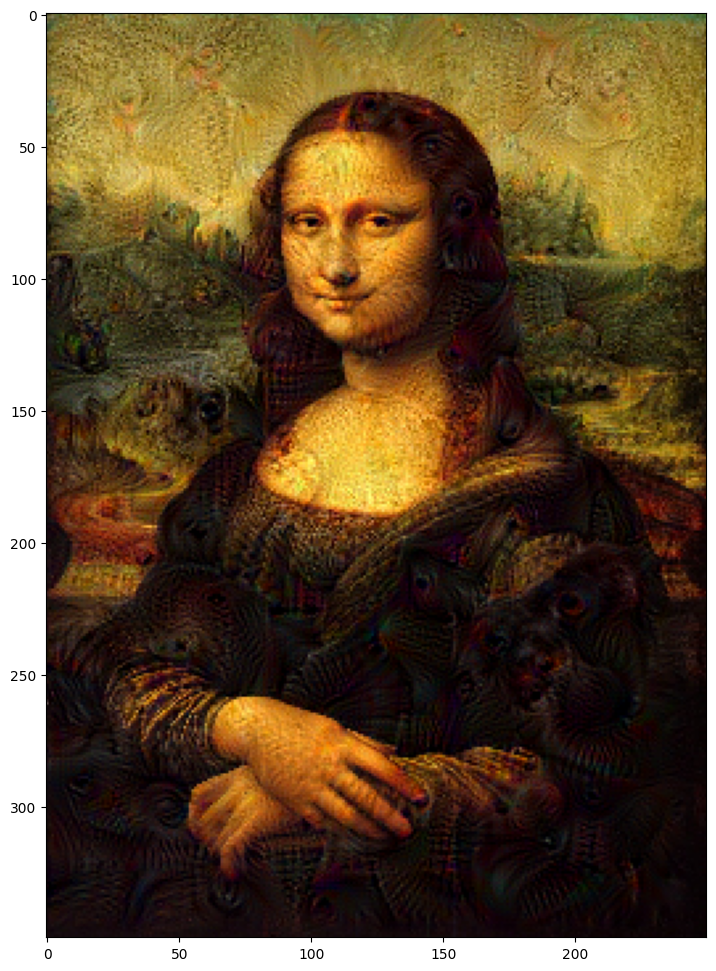

Step 200, loss 1.7049894332885742


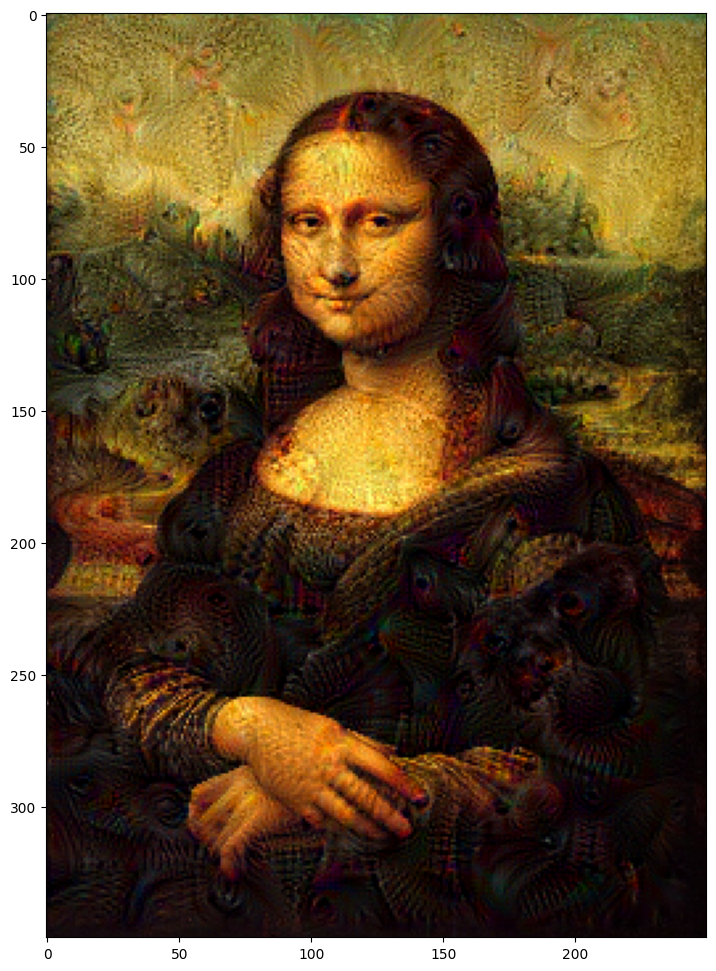

Step 300, loss 1.8521010875701904


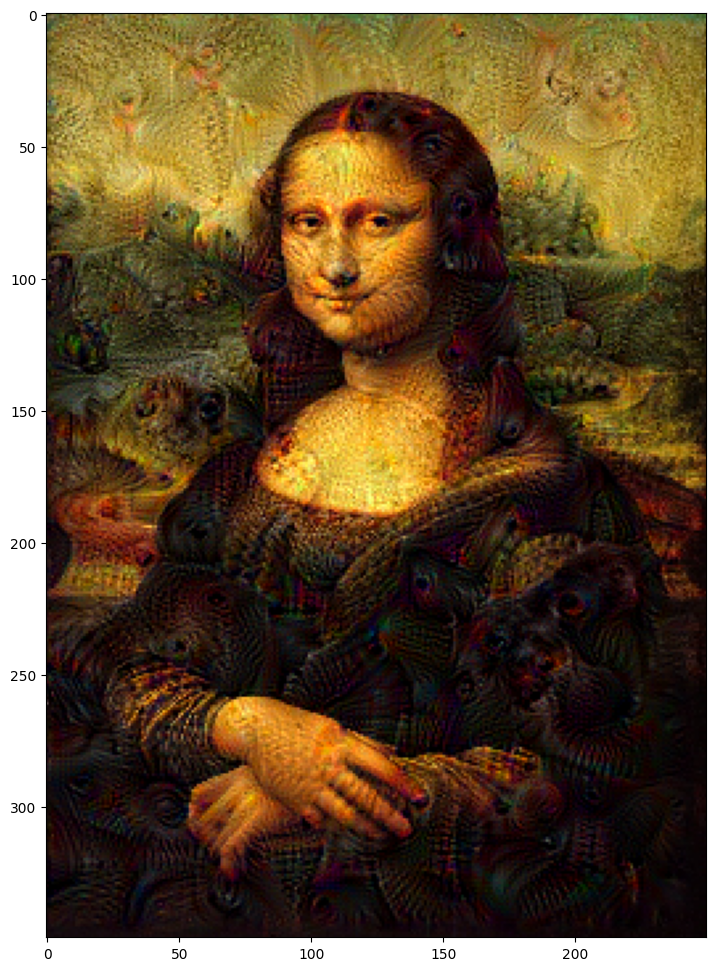

Step 400, loss 1.9622395038604736


KeyboardInterrupt: 

In [37]:
@tf.function
#Calculo de Ascenso de Gradiente
def deepdream(model, image, step_size):
    with tf.GradientTape() as tape:

      tape.watch(image)
      loss = calc_loss(image, model) # llama la funcion que calcula la perdida

    gradients = tape.gradient(loss, image)

    print('GRADIENTES =\n', gradients)
    print('FORMA DE GRADIENTES =\n', np.shape(gradients))

    gradients /= tf.math.reduce_std(gradients)

    image = image + gradients * step_size
    image = tf.clip_by_value(image, -1, 1)

    return loss, image


def run_deep_dream_simple(model, image, steps=100, step_size=0.01):
  # Convierte de uint8 al rango esperado por el modelo.
  image = tf.keras.applications.inception_v3.preprocess_input(image)

  for step in range(steps):
    loss, image = deepdream(model, image, step_size)

    if step % 100 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(deprocess(image))
      plt.show()
      print ("Step {}, loss {}".format(step, loss))

  plt.figure(figsize=(12,12))
  plt.imshow(deprocess(image))
  plt.show()

  return deprocess(image)

def deprocess(image):
  image = 255*(image + 1.0)/2.0
  return tf.cast(image, tf.uint8)


Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/arte-cuadro-da-leonardo-wallpaper-preview.jpg', target_size = (350, 250))
Sample_Image = np.array(Sample_Image)
dream_img = run_deep_dream_simple(model=deepdream_model, image=Sample_Image,
                                  steps=2000, step_size=0.001)

OCTAVE_SCALE = 1.3
Sample_Image= tf.keras.preprocessing.image.load_img(r'stary_night.jpg', target_size = (225, 375))
image = tf.constant(np.array(Sample_Image))
base_shape = tf.cast(tf.shape(image)[:-1], tf.float32)

for n in range(5):
  new_shape = tf.cast(base_shape*(OCTAVE_SCALE**n), tf.int32)
  image = tf.image.resize(image, new_shape).numpy()

  image = run_deep_dream_simple(model=deepdream_model, image=image, steps=400, step_size=0.001)

